11501568/11490434 [==============================] - 0s 0us/step


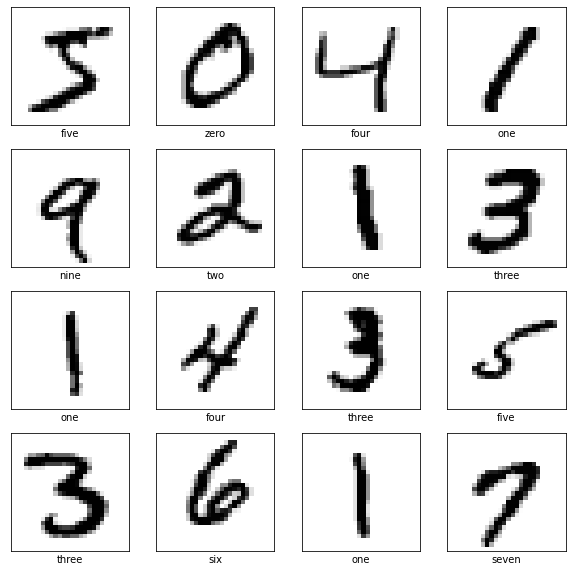

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Preprocessing the data
x_train = x_train.reshape(len(x_train), 28, 28).astype('float32') / 255.0
x_test = x_test.reshape(len(x_test), 28, 28).astype('float32') / 255.0

In [ ]:
# Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(100, activation='sigmoid'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and training the fully-connected NN model
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example.

# adam = optimizers.Adam(lr=0.0001)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4131 - accuracy: 0.8932 - val_loss: 0.2304 - val_accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9423 - val_loss: 0.1679 - val_accuracy: 0.9520
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1481 - accuracy: 0.9569 - val_loss: 0.1344 - val_accuracy: 0.9616
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1168 - accuracy: 0.9664 - val_loss: 0.1153 - val_accuracy: 0.9652
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0954 - accuracy: 0.9725 - val_loss: 0.1049 - val_accuracy: 0.9680


313/313 - 1s - loss: 0.1049 - accuracy: 0.9680
0.9679999947547913


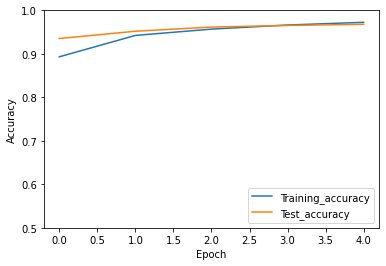

In [ ]:
# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)